Observations:
1. The data shows temperatures are hotter nearer the equator. As the latitude increases above 0 the temperatures will start to decrease and as the latitude decreases below 0 the temperatures will also drop. There is moderate to strong correlation of this.

2. There was no correlation between cloud cover and latitude. There was a wide variance of cloud cover spread over the different latitudes and the correlation value was low.

3. There was no correlation between latitude and wind speed. There was a wide variance of wind speed spread over the different latitudes and the correlation value was low.

In [1]:
# Import dependancies
import json
import random
from citipy import citipy
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.stats as st

# Import API key
from config import weather_api_key

In [2]:
# generate random lat and long
city_df = pd.DataFrame({"Lat":np.random.uniform(-90,90,1400),"Lng":np.random.uniform(-180,180,1400)})
city_df.head()


,Lat,Lng
0,-25.332552,35.651686
1,72.663393,-79.958800
2,-11.706957,98.180633
3,-6.888762,30.824859
4,20.442780,-177.458215


In [3]:
#  Generate Cities List
cities_name = []
countrycode = []
for x in range(0,len(city_df["Lat"])):
    lat = city_df.iloc[x]["Lat"]
    lng = city_df.iloc[x]["Lng"]
    city = citipy.nearest_city(lat,lng)
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)

city_df["City"] = cities_name
city_df["Country"] = countrycode
city_df.head()

,Lat,Lng,City,Country
0,-25.332552,35.651686,inhambane,mz
1,72.663393,-79.958800,clyde river,ca
2,-11.706957,98.180633,bengkulu,id
3,-6.888762,30.824859,karema,tz
4,20.442780,-177.458215,kapaa,us


In [4]:
# remove duplicate cities
no_dup_cities = city_df.drop_duplicates("City", keep="first")
no_dup_cities = no_dup_cities.copy()
no_dup_cities

,Lat,Lng,City,Country
0,-25.332552,35.651686,inhambane,mz
1,72.663393,-79.958800,clyde river,ca
2,-11.706957,98.180633,bengkulu,id
3,-6.888762,30.824859,karema,tz
4,20.442780,-177.458215,kapaa,us
...,...,...,...,...
1385,45.566263,38.452239,novonikolayevskaya,ru
1392,35.399128,-76.605781,washington,us
1394,48.987183,-90.062284,thunder bay,ca
1396,-12.602827,-66.862606,santa rosa,bo


In [5]:
# Create new columns for data from API to be inserted
no_dup_cities["Temperature"] = ""
no_dup_cities["Humidity"] = ""
no_dup_cities["Cloud cover"] = ""
no_dup_cities["Wind speed"] = ""
no_dup_cities["Date"] = ""
no_dup_cities.reset_index(drop=True)

,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date
0,-25.332552,35.651686,inhambane,mz,,,,,
1,72.663393,-79.958800,clyde river,ca,,,,,
2,-11.706957,98.180633,bengkulu,id,,,,,
3,-6.888762,30.824859,karema,tz,,,,,
4,20.442780,-177.458215,kapaa,us,,,,,
...,...,...,...,...,...,...,...,...,...
575,45.566263,38.452239,novonikolayevskaya,ru,,,,,
576,35.399128,-76.605781,washington,us,,,,,
577,48.987183,-90.062284,thunder bay,ca,,,,,
578,-12.602827,-66.862606,santa rosa,bo,,,,,


In [6]:
params = {
    "appid": weather_api_key,
    "units": "metric"
}
base_url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in no_dup_cities.iterrows():
    city_name = row["City"]

    params["q"] = city_name
    response = requests.get(base_url, params=params).json()
    
    try:
        print(f"Processing Record {index} of set 1 {city_name}")
        no_dup_cities.loc[index, "Temperature"] = response["main"]["temp_max"]
  
        print(f"Processing Record {index} of set 2 {city_name}")
        no_dup_cities.loc[index, "Humidity"] = response["main"]["humidity"]
  
        print(f"Processing Record {index} of set 3 {city_name}")
        no_dup_cities.loc[index, "Cloud cover"] = response["clouds"]["all"]
    
        print(f"Processing Record {index} of set 4 {city_name}")
        no_dup_cities.loc[index, "Wind speed"] = response["wind"]["speed"]
   
        no_dup_cities.loc[index, "Date"] = datetime.utcfromtimestamp(response["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        no_dup_cities.loc[index, "Lat"] = response["coord"]["lat"]
        no_dup_cities.loc[index, "Lng"] = response["coord"]["lon"]
    except(KeyError, IndexError):
        print("Missing data ...... Skipping")

Processing Record 0 of set 1 inhambane
Processing Record 0 of set 2 inhambane
Processing Record 0 of set 3 inhambane
Processing Record 0 of set 4 inhambane
Processing Record 1 of set 1 clyde river
Processing Record 1 of set 2 clyde river
Processing Record 1 of set 3 clyde river
Processing Record 1 of set 4 clyde river
Processing Record 2 of set 1 bengkulu
Processing Record 2 of set 2 bengkulu
Processing Record 2 of set 3 bengkulu
Processing Record 2 of set 4 bengkulu
Processing Record 3 of set 1 karema
Processing Record 3 of set 2 karema
Processing Record 3 of set 3 karema
Processing Record 3 of set 4 karema
Processing Record 4 of set 1 kapaa
Processing Record 4 of set 2 kapaa
Processing Record 4 of set 3 kapaa
Processing Record 4 of set 4 kapaa
Processing Record 5 of set 1 fremont
Processing Record 5 of set 2 fremont
Processing Record 5 of set 3 fremont
Processing Record 5 of set 4 fremont
Processing Record 6 of set 1 lebu
Processing Record 6 of set 2 lebu
Processing Record 6 of set 3

In [7]:
no_dup_cities.head()

,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date
0,-23.8650,35.3833,inhambane,mz,18.94,57,6,7.58,2021-07-23 05:13:31
1,70.4692,-68.5914,clyde river,ca,1.45,98,100,0.76,2021-07-23 05:10:29
2,-3.8004,102.2655,bengkulu,id,28.69,64,88,2.43,2021-07-23 05:13:33
3,-6.8205,30.4389,karema,tz,21.66,57,33,4.73,2021-07-23 05:13:34
4,22.0752,-159.3190,kapaa,us,27.99,81,90,0.45,2021-07-23 05:09:15


In [8]:
# clean dataframe and remove NaN
no_dup_cities.replace('', np.nan, inplace=True)
no_dup_cities.dropna(inplace=True)

In [9]:
# Export the city data into a .csv.
no_dup_cities.to_csv("city_weather_test.csv", index=True)
# Display the DataFrame
no_dup_cities.head()

,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date
0,-23.8650,35.3833,inhambane,mz,18.94,57.0,6.0,7.58,2021-07-23 05:13:31
1,70.4692,-68.5914,clyde river,ca,1.45,98.0,100.0,0.76,2021-07-23 05:10:29
2,-3.8004,102.2655,bengkulu,id,28.69,64.0,88.0,2.43,2021-07-23 05:13:33
3,-6.8205,30.4389,karema,tz,21.66,57.0,33.0,4.73,2021-07-23 05:13:34
4,22.0752,-159.3190,kapaa,us,27.99,81.0,90.0,0.45,2021-07-23 05:09:15


In [10]:
#  Inspect the data and remove the cities where the humidity > 100%.
no_dup_cities.describe()
# Skip this step if there are no cities that have humidity > 100%.

,Lat,Lng,Temperature,Humidity,Cloud cover,Wind speed
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,19.212523,14.013649,20.502311,70.731061,53.619318,3.669167
std,33.419838,91.676928,8.120609,19.743411,38.447147,2.631374
min,-54.800000,-179.166700,-4.450000,1.000000,0.000000,0.000000
25%,-7.909275,-67.696875,14.535000,60.000000,16.000000,1.707500
50%,21.423450,21.774550,21.575000,74.500000,55.500000,3.080000
75%,46.802100,92.416850,26.720000,86.000000,93.000000,5.037500
max,78.218600,178.416700,40.060000,100.000000,100.000000,15.060000


Plotting the data

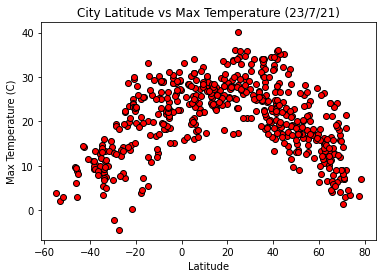

In [12]:
# Latitude vs. Temperature Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Max Temperature (23/7/21)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.savefig("Images/lat_temp.png")

plt.show()

The code plots the latitude of a city and it's maximum temperature. Shows hotter temperatres closer to the equator.

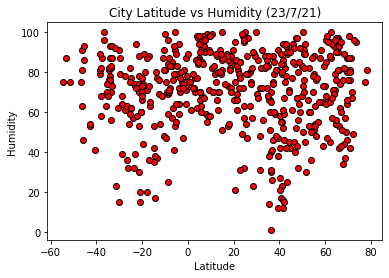

In [11]:
#  Latitude vs. Humidity Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Humidity (23/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("Images/lat_humid.png")

plt.show()

The code plots the latitude of a city and it's humidity level.

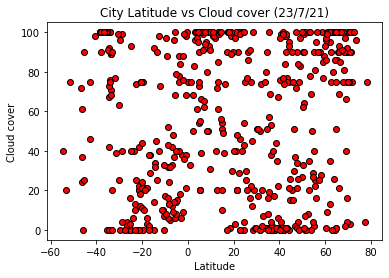

In [13]:
#  Latitude vs. Cloudiness Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Cloud cover (23/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

plt.savefig("Images/lat_cloud.png")

plt.show()

The code plots the latitude of a city and the level of cloud cover.

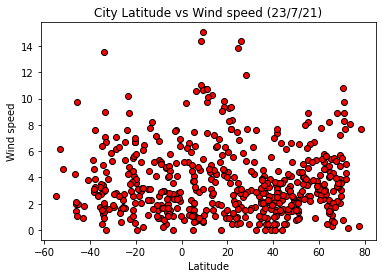

In [14]:
# Latitude vs. Wind Speed Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Wind speed (23/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

plt.savefig("Images/lat_wind.png")

plt.show()

The code plots the latitude of a city and the wind speed.

The r-value is: -0.6265168776507681


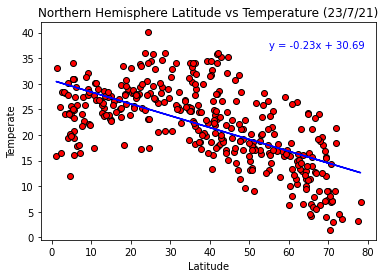

In [16]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Northern = no_dup_cities[no_dup_cities["Lat"]>0]

plt.scatter(Northern["Lat"], Northern["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Temperature (23/7/21)")
plt.ylabel("Temperate")
plt.xlabel("Latitude")
# linear regression
linear = st.linregress(Northern["Lat"], Northern["Temperature"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (55,37), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_temp.png")

plt.show()

The r-value is: 0.7148588469987237


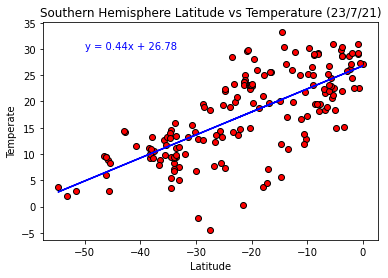

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Southern = no_dup_cities[no_dup_cities["Lat"]<0]

plt.scatter(Southern["Lat"], Southern["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Temperature (23/7/21)")
plt.ylabel("Temperate")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Temperature"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-50,30), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_temp.png")

plt.show()

There is a moderate to strong correlation of latitude and max temperatures. As the latitude gets closer to 0, the max temperatures will generally rise.

The r-value is: -0.1290204606628175


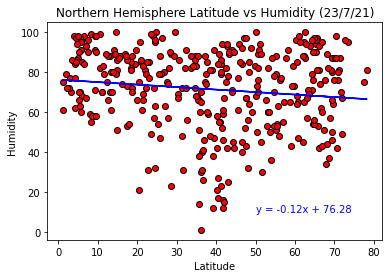

In [20]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Humidity (23/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Humidity"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (50,10), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_humid.png")

plt.show()

The r-value is: -0.03348994946040665


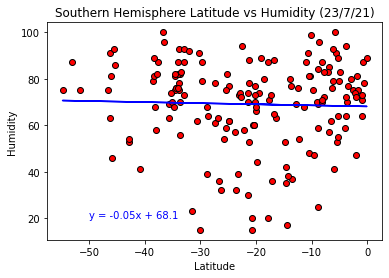

In [22]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Humidity (23/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Humidity"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-50,20), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_humid.png")

plt.show()

There is no correlation between humidity and latitude. The r-value is very low for both hemispheres.

The r-value is: -0.027878423534050976


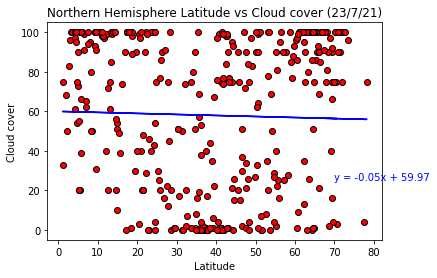

In [23]:
#  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Cloud cover (23/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Cloud cover"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (70,25), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_cloud.png")

plt.show()

The r-value is: -0.19467442878822577


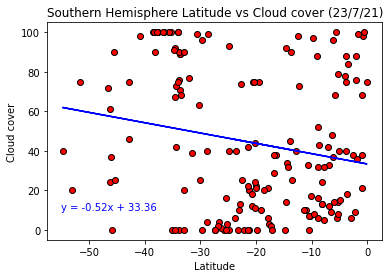

In [25]:
#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Cloud cover (23/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Cloud cover"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-55,10), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_cloud.png")

plt.show()

There is no correlation between latitude and cloud cover.

The r-value is: -0.07291101342409342


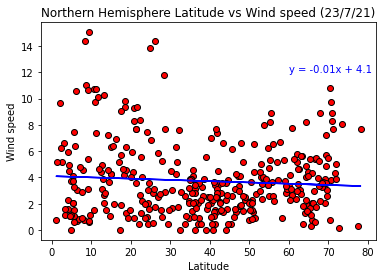

In [26]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Wind speed (23/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Wind speed"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (60,12), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_wind.png")

plt.show()

The r-value is: -0.07206104505740245


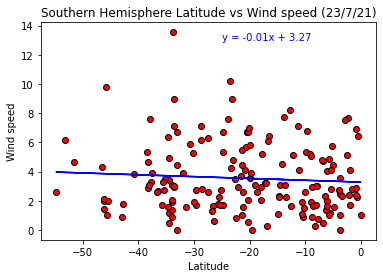

In [27]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Wind speed (23/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Wind speed"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-25,13), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_wind.png")

plt.show()

There is a weak to no correlation between latitude and wind speed.